## Problem Statement

Suppose you are starting a company that grows and sells wild mushrooms.
- Since not all mushrooms are edible, you'd like to be able to tell whether a given mushroom is edible or poisonous based on it's physical attributes
- You have some existing data that you can use for this task.

Can you use the data to help you identify which mushrooms can be sold safely?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Dataset
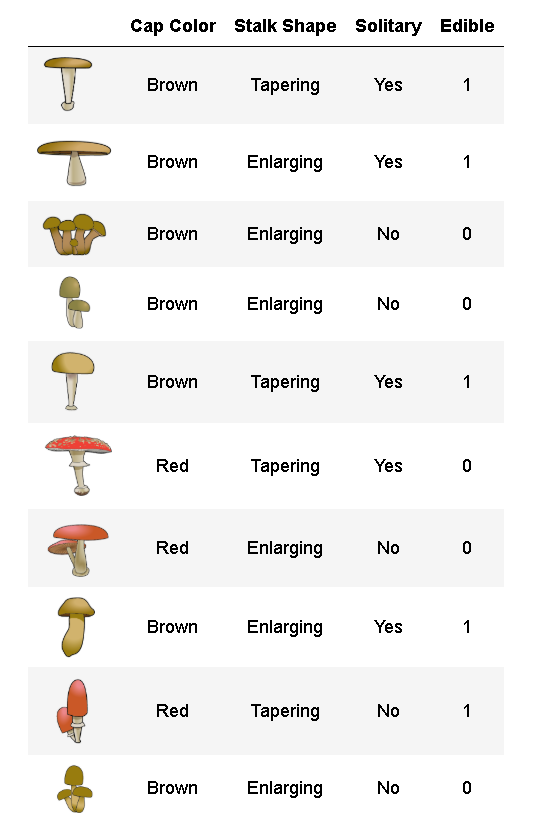

## One hot encoded dataset
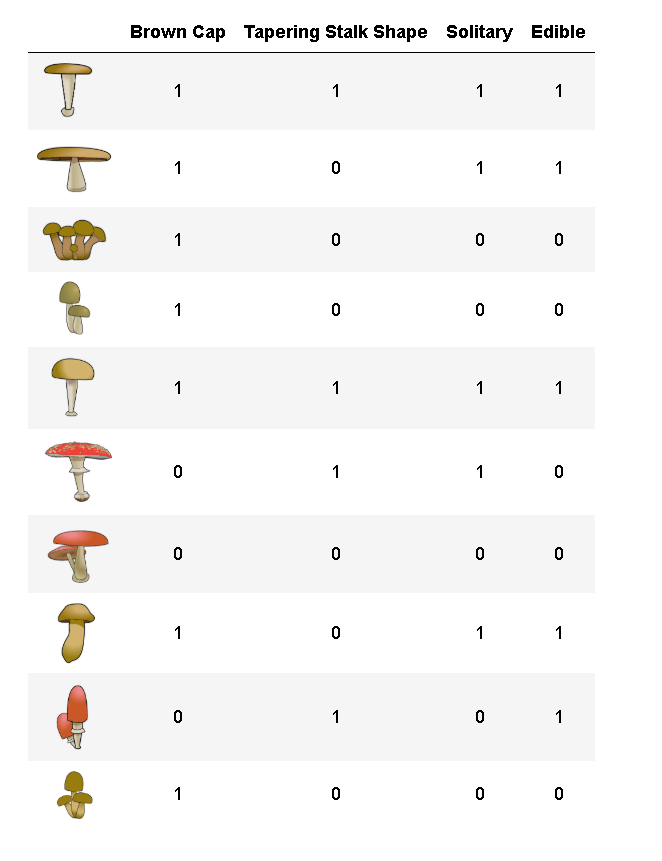

In [3]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])

In [4]:
print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First few elements of X_train:
 [[1 1 1]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 1]]
Type of X_train: <class 'numpy.ndarray'>


In [5]:
print("First few elements of y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

First few elements of y_train: [1 1 0 0 1]
Type of y_train: <class 'numpy.ndarray'>


In [6]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10


## Calculate entropy
* Compute $p_1$, which is the fraction of examples that are edible (i.e. have value = `1` in `y`)
* The entropy is then calculated as

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$


* Note
    * The log is calculated with base $2$
    * For implementation purposes, $0\text{log}_2(0) = 0$. That is, if `p_1 = 0` or `p_1 = 1`, entropy set to `0`
    * Data at a node is not empty (i.e. `len(y) != 0`). Return `0` if it is

In [7]:
def compute_entropy(y):
    entropy = 0.0

    if len(y) != 0:
        p1 = len(y[y == 1]) / len(y)
    else:
        return 0.0

    if p1 != 0 and p1 != 1:
        entropy = -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)
    else:
        entropy = 0.0

    return entropy

## Split dataset

- The function takes in the training data, the list of indices of data points at that node, along with the feature to split on.
- It splits the data and returns the subset of indices at the left and the right branch.

In [8]:
def split_dataset(X, node_indices, feature):
    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)

    return left_indices, right_indices

## Calculate information gain

$$\text{Information Gain} = H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$

where
- $H(p_1^\text{node})$ is entropy at the node
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch, respectively

In [9]:
def compute_information_gain(X, y, node_indices, feature):
    left_indices, right_indices = split_dataset(X, node_indices, feature)

    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    information_gain = 0

    node_entropy = compute_entropy(y_node)
    left_entropy = compute_entropy(y_left)
    right_entropy = compute_entropy(y_right)

    w_left = len(X_left) / len(X_node)
    w_right = len(X_right) / len(X_node)

    weighted_entropy = (w_left * left_entropy) + (w_right * right_entropy)
    information_gain = node_entropy - weighted_entropy

    return information_gain

## Get best split
- The function takes in the training data, along with the indices of datapoint at that node
- The output of the function is the feature that gives the maximum information gain

In [10]:
def get_best_split(X, y, node_indices):
    num_features = X.shape[1]

    best_feature = -1
    max_info_gain = 0

    for feature in range(num_features):

        info_gain = compute_information_gain(X, y, node_indices, feature)

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature

    return best_feature

## Building the tree

Generate a decision tree by successively picking the best feature to split on until we reach the stopping criteria (maximum depth is 2).

In [11]:
tree = []

def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return

    best_feature = get_best_split(X, y, node_indices)

    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))

    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))

    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

In [12]:
root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)

 Depth 0, Root: Split on feature: 2
- Depth 1, Left: Split on feature: 0
  -- Left leaf node with indices [0, 1, 4, 7]
  -- Right leaf node with indices [5]
- Depth 1, Right: Split on feature: 1
  -- Left leaf node with indices [8]
  -- Right leaf node with indices [2, 3, 6, 9]
